<a href="https://colab.research.google.com/github/Tatyana-Stoyanova/Hand-Written-Digits-Recognition/blob/main/HandWritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf

In [ ]:
#LOADING THE DATASET
mnist = tf.keras.datasets.mnist

#SPLITTING DATASET INTO TRAINING SET AND TESTING SET
(x_train, y_train), (x_test,y_test) = mnist.load_data()

#PREPROCESSING
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)

#CREATING THE NEURAL NETWORK
#basic sequential neural network
model = tf.keras.models.Sequential() 

#ADDING LAYERS TO THE MODEL
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) 
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#COMPILE THE MODEL
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#TRAIN THE MODEL
model.fit(x_train,y_train, epochs = 3)
model.save('handwritting.model')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2611 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1062 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9775


313/313 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9740
0.08679112046957016
0.9739999771118164
1/1 [==============================] - 0s 108ms/step
This digit is probably a 9


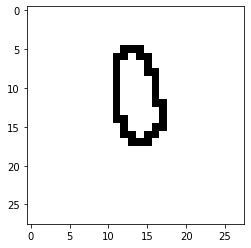

1/1 [==============================] - 0s 18ms/step
This digit is probably a 9


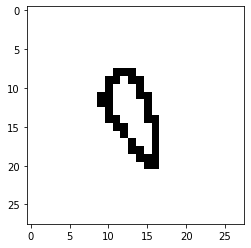

1/1 [==============================] - 0s 19ms/step
This digit is probably a 1


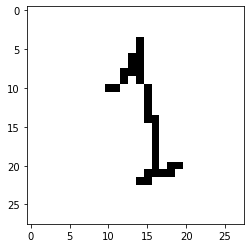

1/1 [==============================] - 0s 19ms/step
This digit is probably a 1


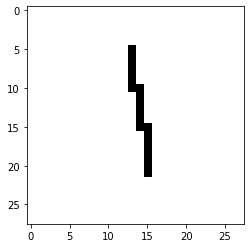

1/1 [==============================] - 0s 18ms/step
This digit is probably a 2


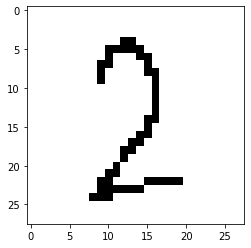

1/1 [==============================] - 0s 18ms/step
This digit is probably a 2


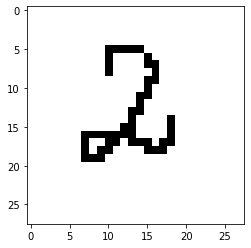

1/1 [==============================] - 0s 17ms/step
This digit is probably a 3


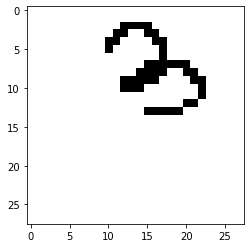

1/1 [==============================] - 0s 17ms/step
This digit is probably a 5


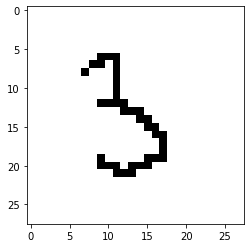

1/1 [==============================] - 0s 18ms/step
This digit is probably a 5


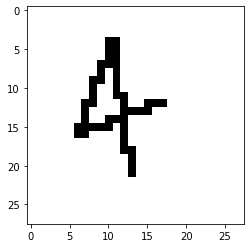

1/1 [==============================] - 0s 18ms/step
This digit is probably a 4


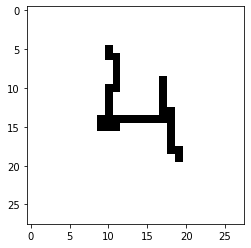

1/1 [==============================] - 0s 17ms/step
This digit is probably a 5


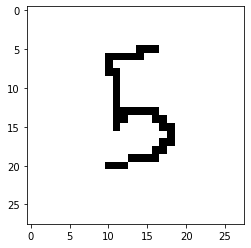

1/1 [==============================] - 0s 17ms/step
This digit is probably a 6


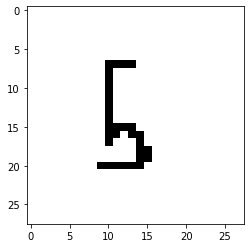

1/1 [==============================] - 0s 17ms/step
This digit is probably a 5


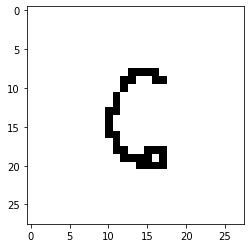

1/1 [==============================] - 0s 17ms/step
This digit is probably a 6


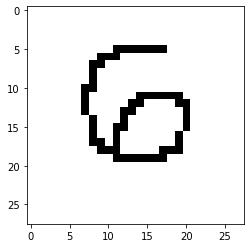

1/1 [==============================] - 0s 19ms/step
This digit is probably a 2


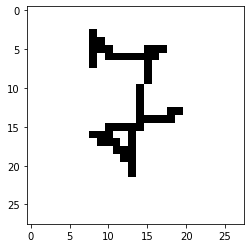

1/1 [==============================] - 0s 21ms/step
This digit is probably a 1


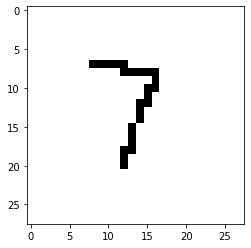

1/1 [==============================] - 0s 18ms/step
This digit is probably a 6


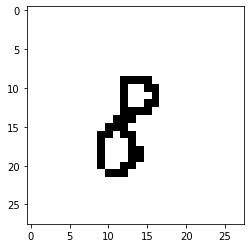

1/1 [==============================] - 0s 19ms/step
This digit is probably a 5


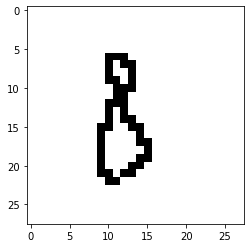

1/1 [==============================] - 0s 18ms/step
This digit is probably a 3


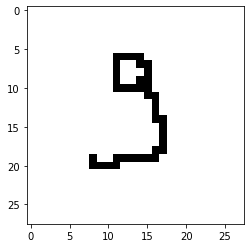

1/1 [==============================] - 0s 19ms/step
This digit is probably a 9


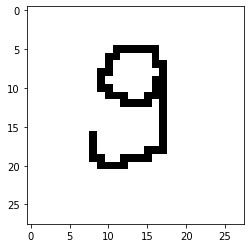

In [ ]:
#LOADING THE MODEL
#saving the model enables us to just load it instead of runing it over and over again
model = tf.keras.models.load_model('handwritting.model')

#EVALUATING THE MODEL
loss,accuracy=model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

#EVALUATING THE MODEL WITH OWN HANDWRITTEN NUMBERS
image_num=0
while(os.path.isfile(f"digits/digit{image_num}.png")):
  try:
    img=cv.imread(f"digits/digit{image_num}.png")[:,:,0]
    img=np.invert(np.array([img])) #image itself in a list in a numpy array -> invert it
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    #np.argmax() gives us the index of the field with max probability
    plt.imshow(img[0],cmap = plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_num += 1